# Using Spacy module

In [1]:
import spacy
import spacy_transformers
from transformers import AutoTokenizer, AutoModelForTokenClassification

In [2]:
# Importing as module.
import en_core_web_trf
nlp = en_core_web_trf.load()

# NLTK again

In [3]:
import nltk
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Raghav\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raghav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Raghav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Raghav\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

# Testing the above modules on our Dataset

In [4]:
# Importing the required libraries
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import math 
import sklearn.metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt
import math 
import sklearn.metrics
from nltk.tree import *
from nltk import word_tokenize, pos_tag, ne_chunk
from transformers import AutoTokenizer, AutoModelForTokenClassification


In [5]:
# Importing the dataset
df = pd.read_excel("C:/Users/Raghav/Downloads/Dataset_Q&A_DBMS.xlsx")

In [6]:
df.head()

,S.No,Questions,Model Answer (ChatGPT),User Answer (Web),Actual Score (0-10)
0,1,List the advantages of DBMS?,1. Data Integrity: DBMS ensures data accuracy ...,1.Better Data Transferring: Database managemen...,7.0
1,2,List the database Applications?,1. MySQL 2. Oracle Database 3. Microsoft SQL S...,1.Oracle Database 2.PostgreSQL 3.SQLite 4.File...,5.0
2,3,Define instances and schemas of database?,Instance: An instance is a copy of the databas...,The overall design of the database is called d...,4.0
3,4,Discuss Data Independence?,Data independence is the ability of a system t...,Data independence is the ability to modify the...,7.0
4,5,Explain database Access for applications Programs,Database Access for applications Programs is a...,Database Access means functionality required i...,0.0


In [7]:
n = df.shape[0]

In [8]:
mod_ans_set = df.iloc[:, 2].values
usr_ans_set = df.iloc[:, 3].values

In [9]:
df.insert(4,"Score_camembert",np.nan)
df.insert(5,"Score_NLTK",np.nan)
df.insert(6,"Score_spacy",np.nan)

In [10]:
df.head()

,S.No,Questions,Model Answer (ChatGPT),User Answer (Web),Score_camembert,Score_NLTK,Score_spacy,Actual Score (0-10)
0,1,List the advantages of DBMS?,1. Data Integrity: DBMS ensures data accuracy ...,1.Better Data Transferring: Database managemen...,NaN,NaN,NaN,7.0
1,2,List the database Applications?,1. MySQL 2. Oracle Database 3. Microsoft SQL S...,1.Oracle Database 2.PostgreSQL 3.SQLite 4.File...,NaN,NaN,NaN,5.0
2,3,Define instances and schemas of database?,Instance: An instance is a copy of the databas...,The overall design of the database is called d...,NaN,NaN,NaN,4.0
3,4,Discuss Data Independence?,Data independence is the ability of a system t...,Data independence is the ability to modify the...,NaN,NaN,NaN,7.0
4,5,Explain database Access for applications Programs,Database Access for applications Programs is a...,Database Access means functionality required i...,NaN,NaN,NaN,0.0


In [11]:
def spacy_name(text):
  doc = nlp(text)
  named_entities = []
  for entity in doc.ents:
    named_entities.append((entity.text, entity.label_))
  return named_entities


In [12]:
def nltk_name(text):
  tokens = word_tokenize(text)
  pos_tags = pos_tag(tokens)
  final_pos1 =[]
  for i in pos_tags:
    if(i[1]=='NNP' or i[1]=='NNS' or i[1]=='NN'):
      final_pos1.append(i)
  named_entities = ne_chunk(final_pos1)
  leaves = named_entities.leaves()
  return leaves

In [13]:
def compute_score_nltk(a,b):
  user_arr = []
  modal_arr = []
    
  for i in range(0, len(a)):
    user_arr.append(a[i][0].lower())
  for i in range(0, len(b)):
    modal_arr.append(b[i][0].lower())
        
  entity_user = list(set(user_arr))
  entity_model = list(set(modal_arr))
    
  n = len(entity_model)
  n1 = len(entity_user)

  count = 0
  if(n==0):
    return 10
  for i in range(n):
    if(entity_model[i] in entity_user):
      count+=1
  count = (count/n)*10
  return count

In [14]:
def compute_score_spacy(user,modal):
  user_arr = []
  modal_arr = []
    
  for i in range(0, len(user)):
    if(user[i][1]!='CARDINAL'):
        user_arr.append(user[i][0].lower())
  for i in range(0, len(modal)):
    if(modal[i][1]!='CARDINAL'):
        modal_arr.append(modal[i][0].lower())
  user = list(set(user_arr))
  modal = list(set(modal_arr))
  
  n = len(modal)
  n1 = len(user)

  count = 0
  if(n==0):
    return 10
  for i in range(n):
    if(modal[i] in user):
      count+=1
  count = (count/n)*10
  return count

In [15]:
def regex(text):
  text2 = ''
  for i in text:
    if ((ord(i) >= 65 and ord(i) <= 90) or (ord(i) >= 97 and ord(i) <= 122) or ord(i)==32):
      text2+=i
  text2 = " ".join(text2.strip().split())
  text2 = text2.lower()
  return text2

In [16]:
for i in range(df.shape[0]):
  modal = df['Model Answer (ChatGPT)'][i]
  user = df['User Answer (Web)'][i]
  modal1 = regex(modal)
  user1 = regex(user)
  modal_entity_nltk = nltk_name(modal1)
  user_entity_nltk = nltk_name(user1)
  score_nltk = compute_score_nltk(user_entity_nltk,modal_entity_nltk)
  df['Score_NLTK'][i] = score_nltk
  modal_entity_spacy = spacy_name(modal)
  user_entity_spacy = spacy_name(user)
  score_spacy = compute_score_spacy(user_entity_spacy,modal_entity_spacy)
  df['Score_spacy'][i] = score_spacy


[('data', 'NNS'), ('integrity', 'NN'), ('dbms', 'NN'), ('data', 'NNS'), ('accuracy', 'NN'), ('consistency', 'NN'), ('database', 'NN'), ('integrity', 'NN'), ('constraints', 'NNS'), ('accuracy', 'NN'), ('consistency', 'NN'), ('database', 'NN'), ('data', 'NNS'), ('security', 'NN'), ('dbms', 'NN'), ('access', 'NN'), ('users', 'NNS'), ('access', 'NN'), ('users', 'NNS'), ('authentication', 'NN'), ('passwords', 'NNS'), ('security', 'NN'), ('measures', 'NNS'), ('dbms', 'NN'), ('users', 'NNS'), ('access', 'NN'), ('data', 'NN'), ('others', 'NNS'), ('development', 'NN'), ('time', 'NN'), ('dbms', 'NN'), ('developers', 'NNS'), ('applications', 'NNS'), ('code', 'NN'), ('functions', 'NNS'), ('data', 'NNS'), ('manipulation', 'NN'), ('query', 'NN'), ('processing', 'NN'), ('data', 'NNS'), ('redundancy', 'NN'), ('dbms', 'NN'), ('data', 'NNS'), ('information', 'NN'), ('table', 'NN'), ('storage', 'NN'), ('space', 'NN'), ('efficiency', 'NN'), ('data', 'NNS'), ('operations', 'NNS'), ('performance', 'NN'), ('

C:\Users\Raghav\AppData\Local\Temp\ipykernel_22156\552362988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_NLTK'][i] = score_nltk
C:\Users\Raghav\AppData\Local\Temp\ipykernel_22156\552362988.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_spacy'][i] = score_spacy


[('mysql', 'NN'), ('oracle', 'NN'), ('database', 'NN'), ('sql', 'NN'), ('server', 'NN'), ('postgresql', 'NN'), ('mongodb', 'NN'), ('ibm', 'NN'), ('db', 'NN'), ('mariadb', 'NN'), ('redis', 'NN'), ('apache', 'NN'), ('cassandra', 'NN'), ('firebase', 'NN'), ('realtime', 'NN'), ('database', 'NN')]
[('oracle', 'NN'), ('database', 'NN'), ('postgresql', 'NN'), ('filemaker', 'NN'), ('interbase', 'NN'), ('firebase', 'NN'), ('psql', 'NN'), ('mongodb', 'NN'), ('mariadb', 'NN'), ('cassandra', 'NN')]
[('instance', 'NN'), ('instance', 'NN'), ('copy', 'NN'), ('database', 'NN'), ('memory', 'NN'), ('data', 'NNS'), ('database', 'NN'), ('data', 'NN'), ('schema', 'NN'), ('blueprint', 'NN'), ('map', 'NN'), ('database', 'NN'), ('structure', 'NN'), ('tables', 'NNS'), ('fields', 'NNS'), ('relationships', 'NNS'), ('views', 'NNS'), ('elements', 'NNS'), ('guide', 'NN'), ('integrity', 'NN'), ('database', 'NN')]
[('design', 'NN'), ('database', 'NN'), ('database', 'NN'), ('schema', 'NN'), ('schema', 'NN'), ('structu

In [17]:
modal = "Raghav's brother Shrishail and lives Mumbai near AUDI"
modal1 = regex(modal)
modal_entity_nltk = nltk_name(modal1)


[('raghavs', 'NN'), ('brother', 'NN'), ('shrishail', 'NN'), ('mumbai', 'NN'), ('audi', 'NN')]


In [18]:
df.head()

,S.No,Questions,Model Answer (ChatGPT),User Answer (Web),Score_camembert,Score_NLTK,Score_spacy,Actual Score (0-10)
0,1,List the advantages of DBMS?,1. Data Integrity: DBMS ensures data accuracy ...,1.Better Data Transferring: Database managemen...,NaN,3.500000,10.0,7.0
1,2,List the database Applications?,1. MySQL 2. Oracle Database 3. Microsoft SQL S...,1.Oracle Database 2.PostgreSQL 3.SQLite 4.File...,NaN,4.666667,0.0,5.0
2,3,Define instances and schemas of database?,Instance: An instance is a copy of the databas...,The overall design of the database is called d...,NaN,3.125000,10.0,4.0
3,4,Discuss Data Independence?,Data independence is the ability of a system t...,Data independence is the ability to modify the...,NaN,2.222222,10.0,7.0
4,5,Explain database Access for applications Programs,Database Access for applications Programs is a...,Database Access means functionality required i...,NaN,1.428571,0.0,0.0


In [19]:
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner")
from transformers import pipeline

def compute_score_camembert(modal, user):
    nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")
    modal = nlp(modal)
    user = nlp(user)
    modal_arr = []
    user_arr = []
    for i in range(0, len(modal)):
        if(modal[i]['score']>=0.9):
            modal_arr.append(modal[i]['word'].lower())
    if(len(modal_arr)==0):
        return 10
    for i in range(0, len(user)):
        user_arr.append(user[i]['word'].lower())
    modal_arr = set(modal_arr)
    user_arr = set(user_arr)
    return (len(modal_arr.intersection(user_arr))/len(modal_arr))*10

In [20]:
for i in range(df.shape[0]):
  modal = df['Model Answer (ChatGPT)'][i]
  user = df['User Answer (Web)'][i]
  score_camembert = compute_score_camembert(modal, user)
  df['Score_camembert'][i] = score_camembert

C:\Users\Raghav\AppData\Local\Temp\ipykernel_22156\1986326709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_camembert'][i] = score_camembert


In [21]:
df

,S.No,Questions,Model Answer (ChatGPT),User Answer (Web),Score_camembert,Score_NLTK,Score_spacy,Actual Score (0-10)
0,1,List the advantages of DBMS?,1. Data Integrity: DBMS ensures data accuracy ...,1.Better Data Transferring: Database managemen...,2.5,3.500000,10.0,7.0
1,2,List the database Applications?,1. MySQL 2. Oracle Database 3. Microsoft SQL S...,1.Oracle Database 2.PostgreSQL 3.SQLite 4.File...,4.0,4.666667,0.0,5.0
2,3,Define instances and schemas of database?,Instance: An instance is a copy of the databas...,The overall design of the database is called d...,10.0,3.125000,10.0,4.0
3,4,Discuss Data Independence?,Data independence is the ability of a system t...,Data independence is the ability to modify the...,10.0,2.222222,10.0,7.0
4,5,Explain database Access for applications Programs,Database Access for applications Programs is a...,Database Access means functionality required i...,5.0,1.428571,0.0,0.0
...,...,...,...,...,...,...,...,...
151,152,Write in detail about Static Hashing?,Static hashing is a form of data storage that ...,Whenever a search-key value is specified in st...,0.0,2.500000,10.0,7.0
152,153,Explain in detail about Extendible Hashing?,Extendible hashing is a technique used in comp...,Extendible hashing is a technique used in comp...,10.0,10.000000,10.0,10.0
153,154,Explain in detail about Linear Hashing?,Linear Hashing is a data structure used to sto...,Linear hashing is a dynamic hashing technique ...,10.0,2.631579,10.0,8.0
154,155,Compare and Contrast Extendible Hashing with L...,Extendible hashing and linear hashing are two ...,Extendible Hashing: 1. Extendible hashing is a...,10.0,4.736842,10.0,9.0


# Generating Visualizations to compare scores of the spacy model and the NLTK model

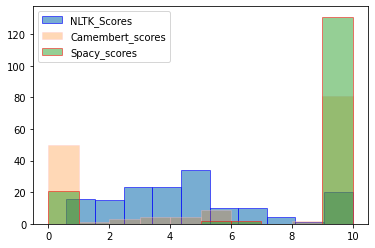

In [22]:
plt.hist(df['Score_NLTK'], label='NLTK_Scores', alpha=0.6, edgecolor='blue')
plt.hist(df['Score_camembert'], label='Camembert_scores', alpha=0.3, edgecolor='pink')
plt.hist(df['Score_spacy'], label='Spacy_scores', alpha=0.5, edgecolor='red')
plt.legend()
plt.show()

# Generating Excel Sheet

In [23]:
df.to_excel("C:/Users/Raghav/Downloads/Prepared_Dataset_Scored.xlsx")

In [24]:
mse_NLTK = sklearn.metrics.mean_squared_error(df['Score_camembert'], df['Score_NLTK'])  
rmse_NLTK = math.sqrt(mse_NLTK)  

print("The difference between actual and NLTK values", rmse_NLTK)  

The difference between actual and NLTK values 4.393178384945248


In [25]:
mse_spacy = sklearn.metrics.mean_squared_error(df['Score_camembert'], df['Score_spacy'])  
rmse_spacy = math.sqrt(mse_spacy)  

print("The difference between actual and Spacy values", rmse_spacy)  

The difference between actual and Spacy values 5.766435695191668


In [26]:
'RAGHV'.lower()

'raghv'